In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
matches = pd.read_csv("data/matches.csv")
matches.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2023-08-12,17:30,Premier League,Matchweek 1,Sat,Home,W,5.0,1.0,...,Match Report,NaN,17.0,12.0,13.2,0.0,0.0,0.0,2023,Newcastle United
1,0,2023-08-12,15:00,Premier League,Matchweek 1,Sat,Home,W,4.0,1.0,...,Match Report,NaN,26.0,11.0,17.0,0.0,1.0,1.0,2023,Brighton and Hove Albion
2,1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3.0,0.0,...,Match Report,NaN,17.0,8.0,13.9,0.0,0.0,0.0,2023,Manchester City
3,1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2.0,1.0,...,Match Report,NaN,15.0,7.0,19.1,0.0,0.0,0.0,2023,Arsenal
4,0,2023-08-12,15:00,Premier League,Matchweek 1,Sat,Away,W,1.0,0.0,...,Match Report,NaN,24.0,8.0,18.5,1.0,0.0,0.0,2023,Crystal Palace


In [13]:
matches[matches['team']=='Arsenal'].groupby('season')['xg'].agg('mean')

season
2020    1.363158
2021    1.589474
2022    1.886842
2023    0.800000
Name: xg, dtype: float64

In [18]:
matches.groupby(['season', 'team'])['xg', 'gf'].agg('mean')

/var/folders/zd/khghfy3j0bq3q035njvjgsth0000gn/T/ipykernel_69755/455385653.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  matches.groupby(['season', 'team'])['xg', 'gf'].agg('mean')


xg        gf
season team                                        
2020   Arsenal                   1.363158  1.447368
       Aston Villa               1.386842  1.447368
       Brighton and Hove Albion  1.342105  1.052632
       Burnley                   1.039474  0.868421
       Chelsea                   1.642105  1.526316
...                                   ...       ...
2023   Nottingham Forest         1.300000  1.500000
       Sheffield United          0.500000  0.500000
       Tottenham Hotspur         1.300000  2.000000
       West Ham United           1.100000  1.000000
       Wolverhampton Wanderers   2.200000  0.000000

[80 rows x 2 columns]

In [25]:
goal_performance_2022 = matches[matches['season']==2022].groupby(['team'])['xg', 'gf'].agg('mean')

/var/folders/zd/khghfy3j0bq3q035njvjgsth0000gn/T/ipykernel_69755/411617532.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  goal_performance_2022 = matches[matches['season']==2022].groupby(['team'])['xg', 'gf'].agg('mean')


In [32]:
goal_performance_2022['teams'] = goal_performance_2022.index
goal_performance_2022.head()

,xg,gf,teams
team,,,
Arsenal,1.886842,2.315789,Arsenal
Aston Villa,1.321053,1.342105,Aston Villa
Bournemouth,1.007895,0.973684,Bournemouth
Brentford,1.500000,1.526316,Brentford
Brighton and Hove Albion,1.928947,1.894737,Brighton and Hove Albion


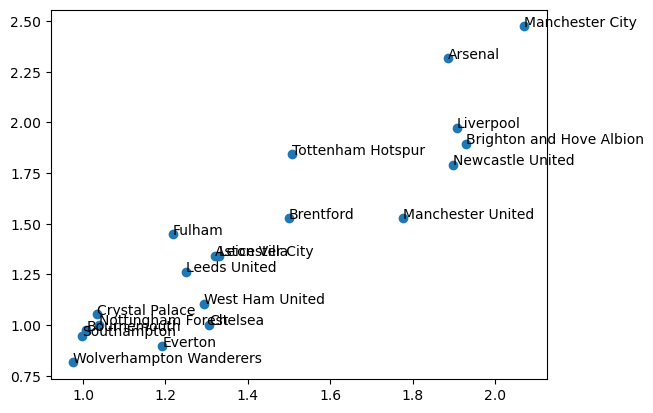

In [54]:
# Draw the plot
#line = sns.scatterplot(goal_performance_2022, x='xg', y='gf')
plt.scatter(x=goal_performance_2022['xg'], y=goal_performance_2022['gf'])

# Annotate label points 
for i, team in enumerate (goal_performance_2022['teams']):
    plt.text(goal_performance_2022['xg'][i], goal_performance_2022['gf'][i], team)
#line.set_xlim (0, 5)
#line.set_ylim (0, 5)


In [55]:
matches.columns

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team'],
      dtype='object')

In [63]:
matches['result'].value_counts()

W    890
L    890
D    522
Name: result, dtype: int64

In [65]:
# create a list of our conditions
conditions = [
    (matches['result'] == 'W'),
    (matches['result'] == 'D'),
    (matches['result'] == 'L')
]

# create a list of the values we want to assign for each condition
values = [3, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
matches['points'] = np.select(conditions, values)

# display updated DataFrame
matches.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,notes,sh,sot,dist,fk,pk,pkatt,season,team,points
0,0,2023-08-12,17:30,Premier League,Matchweek 1,Sat,Home,W,5.0,1.0,...,NaN,17.0,12.0,13.2,0.0,0.0,0.0,2023,Newcastle United,3
1,0,2023-08-12,15:00,Premier League,Matchweek 1,Sat,Home,W,4.0,1.0,...,NaN,26.0,11.0,17.0,0.0,1.0,1.0,2023,Brighton and Hove Albion,3
2,1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3.0,0.0,...,NaN,17.0,8.0,13.9,0.0,0.0,0.0,2023,Manchester City,3
3,1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2.0,1.0,...,NaN,15.0,7.0,19.1,0.0,0.0,0.0,2023,Arsenal,3
4,0,2023-08-12,15:00,Premier League,Matchweek 1,Sat,Away,W,1.0,0.0,...,NaN,24.0,8.0,18.5,1.0,0.0,0.0,2023,Crystal Palace,3


In [67]:
matches[matches['season']==2022].groupby(['team'])['points'].agg('sum')
#matches[matches['season']==2022].groupby(['team'])['xg', 'gf'].agg('mean')

team
Arsenal                     84
Aston Villa                 61
Bournemouth                 39
Brentford                   59
Brighton and Hove Albion    62
Chelsea                     44
Crystal Palace              45
Everton                     36
Fulham                      52
Leeds United                31
Leicester City              34
Liverpool                   67
Manchester City             89
Manchester United           75
Newcastle United            71
Nottingham Forest           38
Southampton                 25
Tottenham Hotspur           60
West Ham United             40
Wolverhampton Wanderers     41
Name: points, dtype: int64